In [1]:
import shap
import matplotlib as plt
import joblib
import pandas as pd
import numpy as np

def ABS_SHAP(df_shap,df):
    
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(6,10),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
    return shap_abs

In [2]:
'''
X = df.drop([label], axis = 1)
y = df[label]
data_train,data_test=sssplit(df,label)
X_train=data_train.drop([label],axis=1)
X_test=data_test.drop([label],axis=1)
y_train=data_train[label]
y_test=data_test[label]
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

params = {
            "eta": 0.01,
            "objective": "binary:logistic",
            "subsample": 0.5,
            "base_score": np.mean(y_train),
            "eval_metric": "logloss"}

model = xgb.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
# shap.summary_plot(shap_values, X, plot_type="bar")
# for name in X_train.columns:
#     shap.dependence_plot(name, shap_values, X, display_features=X)
'''

'\nX = df.drop([label], axis = 1)\ny = df[label]\ndata_train,data_test=sssplit(df,label)\nX_train=data_train.drop([label],axis=1)\nX_test=data_test.drop([label],axis=1)\ny_train=data_train[label]\ny_test=data_test[label]\nd_train = xgb.DMatrix(X_train, label=y_train)\nd_test = xgb.DMatrix(X_test, label=y_test)\n\nparams = {\n            "eta": 0.01,\n            "objective": "binary:logistic",\n            "subsample": 0.5,\n            "base_score": np.mean(y_train),\n            "eval_metric": "logloss"}\n\nmodel = xgb.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)\nexplainer = shap.TreeExplainer(model)\nshap_values = explainer.shap_values(X)\n# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])\n# shap.summary_plot(shap_values, X, plot_type="bar")\n# for name in X_train.columns:\n#     shap.dependence_plot(name, shap_values, X, display_features=X)\n'

In [3]:
model_path = '20210724_model_ceria_model1_LogisticReg.pkl'
model = joblib.load(model_path)

In [5]:
predictors =[
 'empSatisfaction_to_Absences',
 'SpecialProjectsCount',
 'DaysLateLast30',
 'Absences',
 'age_when_hire_day',
 'EngagementSurvey',
 'RecruitmentSource_Website',
 'Squad_RPA & Profitability',
 'EmpSatisfaction',
 'RecruitmentSource_LinkedIn',
 'RoleID_Scrum Master',
 'RecruitmentSource_Diversity Job Fair',
 'Tribe_FIN',
 'Tribe_EDU',
 'Squad_Inpoin',
 'RecruitmentSource_Employee Referral',
 'RecruitmentSource_Indeed',
 'Tribe_HLT',
 'EmpStatusID_Karyawan Organik',
 'Squad_HunianAja',
 'Squad_Pay',
 'Squad_PeduliLindungi',
 'Squad_IndiBOX Apps',
 'Squad_ChatAja',
 'Squad_Squad Service Core',
 'Squad_MyPertamina',
 'RoleID_Mobile Developer Android',
 'RecruitmentSource_CareerBuilder',
 'RoleID_Business Analyst',
 'Tribe_ENT',
 'Squad_Logee Truck All Product',
 'Squad_Get Support',
 'Tribe_IHL',
 'Squad_Squad Pijar Sekolah',
 'Squad_IndiHome Smart',
 'Squad_Intermoda',
 'TermReason_military',
 'hire_to_review_day',
'Absence_to_hire_to_review'
]

target_label = 'label'

In [6]:
explainer = shap.TreeExplainer(model)
df_train = pd.read_csv('20210724_data_train_HR_analytics_Codex.csv')

Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [16]:
X = df_train[predictors]
y = df_train['label']
shap_values = explainer.shap_values(X)

invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in subtract


,bill_amt,total_bill,max_saldol1m,min_saldol1m,median_saldol1m,freq_creditl1m,freq_debitl1m,credit_amtl1m,debit_amtl1m,disp_income_amtl1m,...,education_Strata 3 (S3),occupation_Karyawan,occupation_Lain-Lain,occupation_Pensiunan,occupation_Profesional,occupation_TNI/POLRI,occupation_Wiraswasta,bill_to_limit,bill_to_credit,bill_to_saldo
0,0.229558,0.548666,0.372702,0.639078,1.645579,0.051743,0.188777,0.221940,2.027798,0.691338,...,0.0,0.007582,0.126388,0.0,0.000214,0.000223,0.114806,0.308283,0.560895,0.159491
1,5.055836,0.770009,0.209602,0.124014,0.441828,0.007534,0.149069,0.179375,0.619156,0.656771,...,0.0,0.013443,0.044010,0.0,0.005560,0.000747,0.026967,0.079428,1.178259,0.023005
2,3.793348,0.255699,0.167315,0.661749,1.109858,0.033300,0.034854,0.072323,1.673935,0.540806,...,0.0,0.015824,0.007592,0.0,0.000216,0.000482,0.133067,0.254731,0.379208,0.049400
3,4.355763,0.657673,1.049314,0.561021,0.929677,0.015706,0.024057,0.036103,0.702703,0.801415,...,0.0,0.002853,0.000882,0.0,0.000602,0.000208,0.060530,0.020319,0.248036,0.137131
4,2.515329,0.228764,0.478178,0.192623,0.996848,0.003051,0.099107,0.009710,1.132818,0.503589,...,0.0,0.016795,0.485409,0.0,0.000013,0.000124,0.031808,0.130035,0.628512,0.005276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,3.793994,0.238358,1.108268,0.575067,1.151482,0.079223,0.005169,0.294619,0.853799,0.680780,...,0.0,0.022946,0.004775,0.0,0.000274,0.000259,0.070600,0.604157,0.501195,0.238025
6537,4.980316,0.596066,0.348562,0.765742,1.370139,0.072873,0.088675,0.041348,0.831074,0.522712,...,0.0,0.009329,0.004793,0.0,0.000022,0.000544,0.088120,0.630871,0.166745,0.226908
6538,2.925612,0.736144,0.949966,0.156986,0.402158,0.044946,0.274038,0.108653,1.250709,0.859478,...,0.0,0.006613,0.028359,0.0,0.000894,0.000812,0.024296,0.641804,0.120553,0.345356
6539,3.437071,0.271301,1.109712,0.091288,0.611234,0.036620,0.103661,0.083308,2.304121,0.276293,...,0.0,0.023211,0.097128,0.0,0.014017,0.000809,0.008080,0.245135,0.887418,0.365928


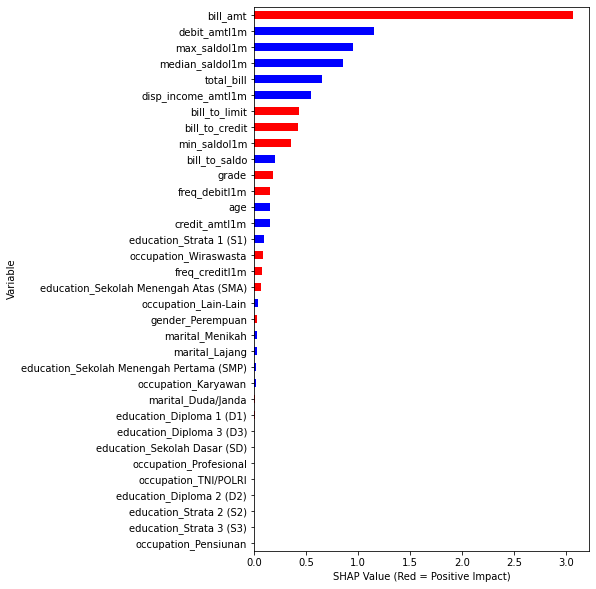

In [17]:
ABS_SHAP(shap_values,X) 


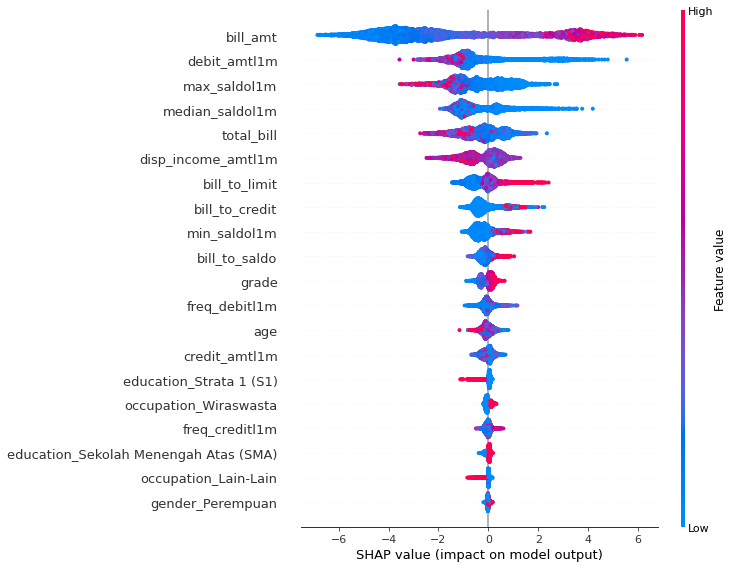

In [18]:
shap.summary_plot(shap_values, X)

invalid value encountered in subtract


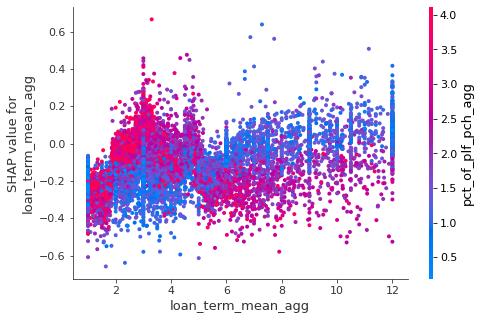

In [16]:
shap.dependence_plot("loan_term_mean_agg", shap_values, X)